In [2]:
pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
torch.cuda.current_device

<function torch.cuda.current_device() -> int>

In [5]:
torch.cuda.get_device_name(0)


'Tesla T4'

In [6]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
df = pd.read_csv('/content/Iris.csv')


In [7]:
df = df.head()

In [8]:
df.shape

(5, 6)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
X = df.drop(["Species"], axis = 1 ).values
y = le.fit_transform(df["Species"].values)

# chia dữ liệu với test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

X_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1, 1)
y_test = torch.LongTensor(y_test).reshape(-1, 1)

print(f"train size {len(y_train)}")
#

train size 4


In [10]:
import torch

In [11]:
#tạo một tensor với requirments_grad được đặt thành true
x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)

tensor(2., requires_grad=True)
None


In [12]:
# Định nghĩa hàm
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [13]:
y.grad_fn

In [14]:
# Thực hiện truyền ngược và tính toán các gradient
y.backward()

In [15]:
# Kết quả đạo hàm
x.grad

tensor(93.)

In [16]:
# Bai tap
# Cho y = 5x^6+3x^3+2x^1+x+2x+5x^4+1
# Cho biết độ dốc của đa thức trên tại điểm nào


In [17]:
import sympy as sp

x = sp.symbols('x')
y = 5*x**6 + 3*x**3 + 5*x**4 + 3*x + 1

# Tính đạo hàm
y_derivative = sp.diff(y, x)

# Chọn điểm để tính độ dốc
point = 1  # bạn có thể thay đổi giá trị này
slope_at_point = y_derivative.subs(x, point)

# In ra độ dốc tại điểm đã chọn
print(f"Độ dốc của đa thức tại x = {point} là: {slope_at_point}")

Độ dốc của đa thức tại x = 1 là: 62


BTVN 1:
Tạo một tensor có giá trị ban đầu là 2.0.

Định nghĩa hàm số và tính gradient

y =  x^3 + 2x^2 + 5x + 1

Hãy tính dy/dx tại giá trị của x

Dùng phương pháp Gradient Descent với learning rate alpha = 0.1 để cập nhật giá trị x trong 10 vòng lặp


In [18]:
import torch

x = torch.tensor(2.0, requires_grad=True)

In [19]:
y = x**3 + 2*x**2 + 5*x + 1
print(y)

tensor(27., grad_fn=<AddBackward0>)


In [20]:
y.backward()
print(x.grad)

tensor(25.)


In [21]:
alpha = 0.1  # Learning rate

for i in range(10):
    y = x**3 + 2*x**2 + 5*x + 1
    y.backward()
    with torch.no_grad():
        x -= alpha * x.grad
        x.grad.zero_()  # Reset gradient
    print(f"Lần lặp {i+1}: x = {x.item()}, y = {y.item()}")

Lần lặp 1: x = -3.0, y = 27.0
Lần lặp 2: x = -5.0, y = -23.0
Lần lặp 3: x = -11.0, y = -99.0
Lần lặp 4: x = -43.400001525878906, y = -1143.0
Lần lặp 5: x = -591.6080932617188, y = -78195.3984375
Lần lặp 6: x = -105355.5078125, y = -206365872.0
Lần lặp 7: x = -3329998336.0, y = -1169401080446976.0
Lần lặp 8: x = -3.32666671295837e+18, y = -3.692598275118773e+28
Lần lặp 9: x = -3.3200133669524894e+36, y = -inf
Lần lặp 10: x = -inf, y = nan


BTVN 2:

Tạo một tập dữ liệu giả lập với x là số giờ học( ngẫu nhiên từ 1 - 10) và y là số điểm được tính theo công thức y = 3x + 5 + noise

Với noise là một giá trị ngẫu nhiên nhỏ

1. Khởi tạo tham số w và b ngẫu nhiên với requires_grad=true

2. tính MSE

3. Tính gradient

4. Cập nhật tham số w và b bằng gradient Descent với Learning alpha = 0.01

5. Lặp lại quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình


In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập
np.random.seed(42)
n_samples = 100
x = np.random.randint(1, 11, size=n_samples)
true_w = 3
true_b = 5
noise = np.random.randn(n_samples) * 2
y = true_w * x + true_b + noise



In [37]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [58]:
# 2. Tính MSE
def compute_mse(x, y, w, b):
    # Convert x and y to PyTorch tensors
    x = torch.tensor(x, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)
    predictions = w * x + b
    # Use detach().numpy() before calculating MSE
    mse = np.mean((predictions.detach().numpy() - y.detach().numpy()) ** 2)
    return mse


In [59]:
# 3. Tính gradient
def compute_gradients(x, y, w, b):
    # Convert x and y to PyTorch tensors
    x = torch.tensor(x, dtype=torch.float32) # Convert to float32
    y = torch.tensor(y, dtype=torch.float32)

    n = len(y)
    predictions = w * x + b
    dw = (2/n) * torch.dot(x, (predictions - y))  # Use torch.dot
    db = (2/n) * torch.sum(predictions - y)     # Use torch.sum
    return dw, db

In [60]:
# 4. Cập nhật tham số bằng Gradient Descent
learning_rate = 0.01
n_iterations = 100

mse_values = []

for _ in range(n_iterations):
    mse = compute_mse(x, y, w, b)
    mse_values.append(mse)
    dw, db = compute_gradients(x, y, w, b)
    # Update w and b using torch operations
    with torch.no_grad():
        w -= learning_rate * dw
        b -= learning_rate * db

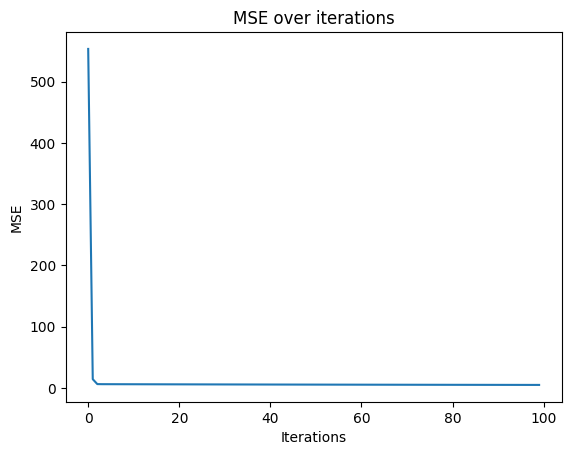

In [61]:
# 5. Vẽ biểu đồ MSE theo số vòng lặp
plt.plot(mse_values)
plt.title('MSE over iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()